In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
TFile *file = TFile::Open("Tracks_Clusters.root");
//TFile *file = TFile::Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root");

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

<b>1. Plot the number of average interactions per bunch-crossing (mu_average)</b>

In [4]:
Float_t mu_avrg = -1;
tree->SetBranchAddress("mu_average", &mu_avrg);

In [5]:
TCanvas *canvas = new TCanvas("Canvas","a first way to plot a variable",800,600);

In [6]:
TH1F *hist_mu_avrg = new TH1F("mu_average","Example plot: Numero de intracciones promedio que ocurrieron; mu_average ; Events ",50,1,50);

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_mu_avrg->Fill(mu_avrg);
}

std::cout << "Done!" << std::endl;

Done!


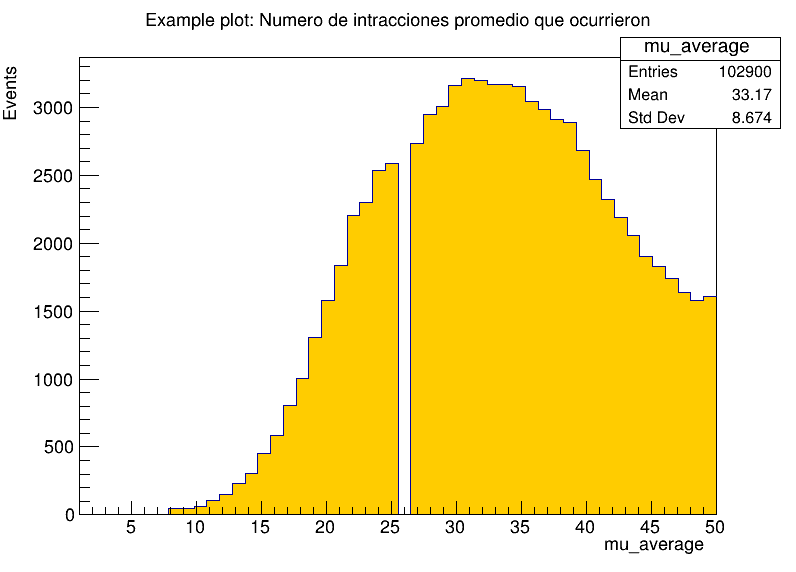

In [8]:
hist_mu_avrg->SetFillColor(kOrange);
hist_mu_avrg->Draw();
canvas->Draw();

In [9]:
Float_t scale = hist_mu_avrg->Integral();
hist_mu_avrg->Scale(1/scale);
hist_mu_avrg->SetFillColor(2);

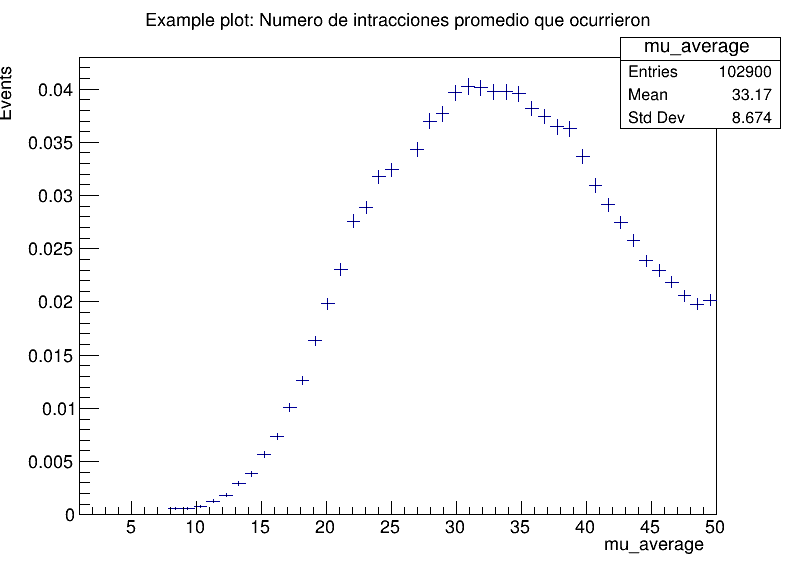

In [10]:
hist_mu_avrg->Draw();
canvas->Draw();

<b>2. Make a 2D histogram of NPV vs. mu<\b>

In [11]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

In [12]:
TH2F *hist_npv_mu = new TH2F("NPV vs. mu_average","Example plot: Number of primary vertices vs mu average; NPV; mu_average ; Events ",50,1,50,50,1,100);

In [13]:
int nentries1, nbytes1, j;
nentries1 = (Int_t)tree->GetEntries();

for (j = 0; j < nentries1; j++)
{
    nbytes1 = tree->GetEntry(j);
    hist_npv_mu->Fill(npv,mu_avrg);
}

std::cout << "Done!" << std::endl;

Done!


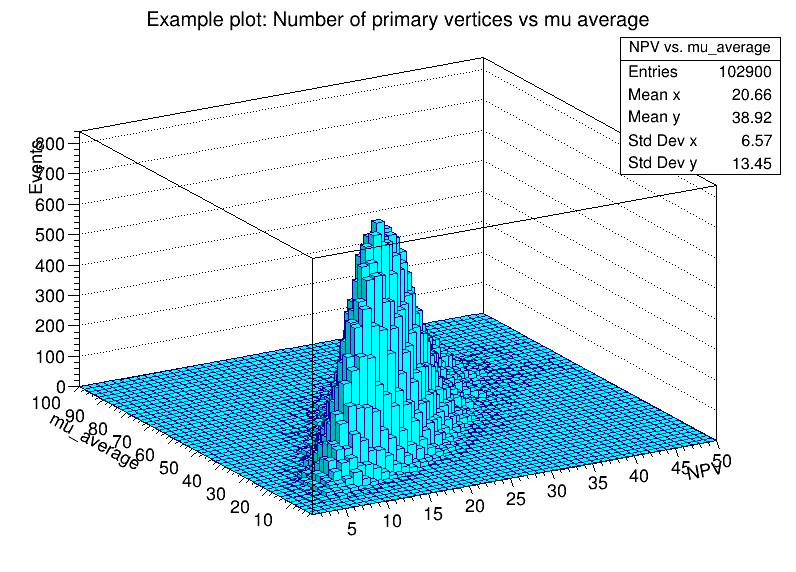

In [14]:
hist_npv_mu->SetFillColor(kCyan);
hist_npv_mu->Draw("LEGO1");
canvas->Draw();

<b>3. Make a 2D histogram of NPV and mu vs. nTracks and nClusters</b>

In [15]:
vector<float> *tracks_pt;
vector<float> *clusters_pt;

tree->SetBranchAddress("Tracks_pt", &tracks_pt);
tree->SetBranchAddress("Clusters_pt", &clusters_pt);

In [16]:
TH2F *hist_NPV_nTrks = new TH2F("NPV vs. NTracks","Number of Primary Vertex vs. Number of tracks; NTracks ; NPV; Events ",50,0,1000,50,0,50);
TH2F *hist_NPV_nCltrs = new TH2F("NPV vs. NClusters","Number of Primary Vertex vs. Number of clusters; NClusters ; NPV; Events ",50,0,1000,50,0,50);
TH2F *hist_mu_nTrks = new TH2F("mu_average vs. NTracks","Number of Average Interactions vs. Number of tracks; NTracks ; mu_average; Events ",50,0,1000,50,0,50);
TH2F *hist_mu_nCltrs = new TH2F("mu_average vs. NClusters","Number of Average Interactions vs. Number of clusters; NClusters ; mu_average; Events ",50,0,1000,50,0,50);

In [17]:
int nentries2, nbytes2, k;
nentries2 = (Int_t)tree->GetEntries();

for (k = 0; k < nentries2; k++)
{
    nbytes2 = tree->GetEntry(k);
    hist_NPV_nTrks->Fill(tracks_pt->size(),npv);
    hist_NPV_nCltrs->Fill(clusters_pt->size(),npv);
    hist_mu_nTrks->Fill(tracks_pt->size(),mu_avrg);
    hist_mu_nCltrs->Fill(clusters_pt->size(),mu_avrg);

}

std::cout << "Done!" << std::endl;

Done!


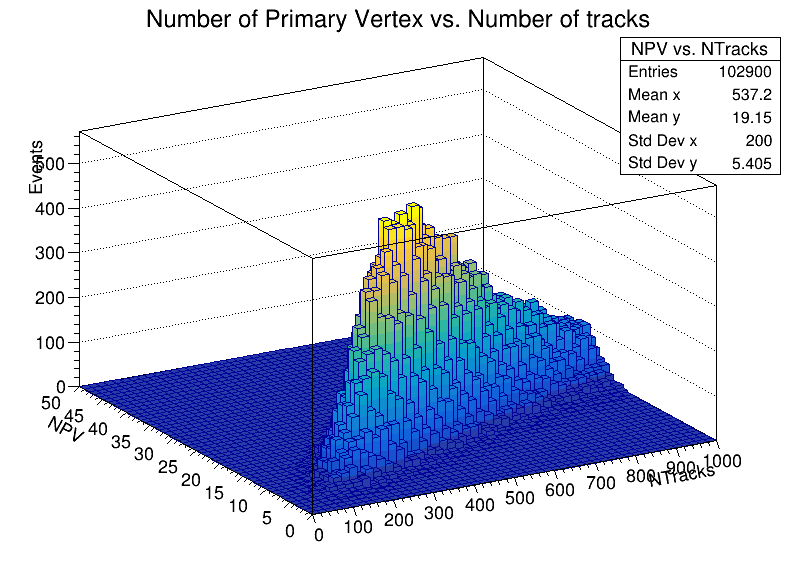

In [18]:
hist_NPV_nTrks->SetFillColor(kCyan);
hist_NPV_nTrks->Draw("LEGO2");
canvas->Draw();

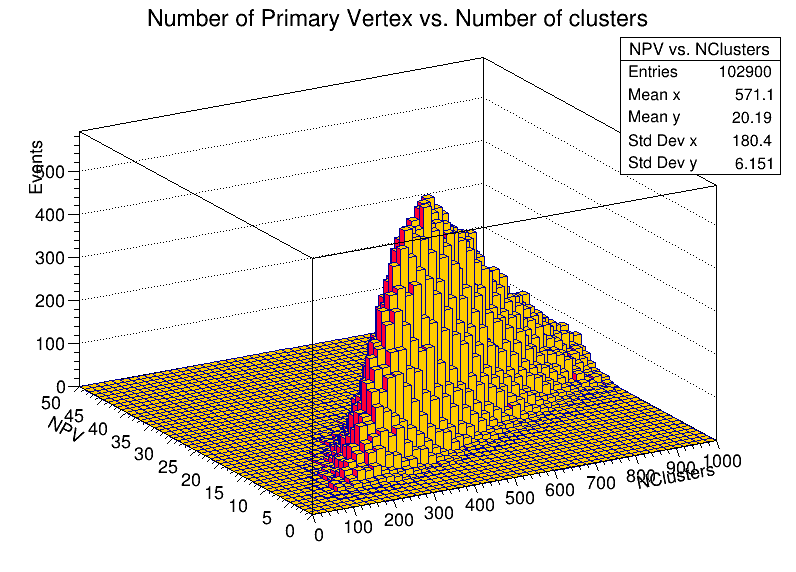

In [19]:
hist_NPV_nCltrs->SetFillColor(kOrange);
hist_NPV_nCltrs->Draw("LEGO1");
canvas->Draw();

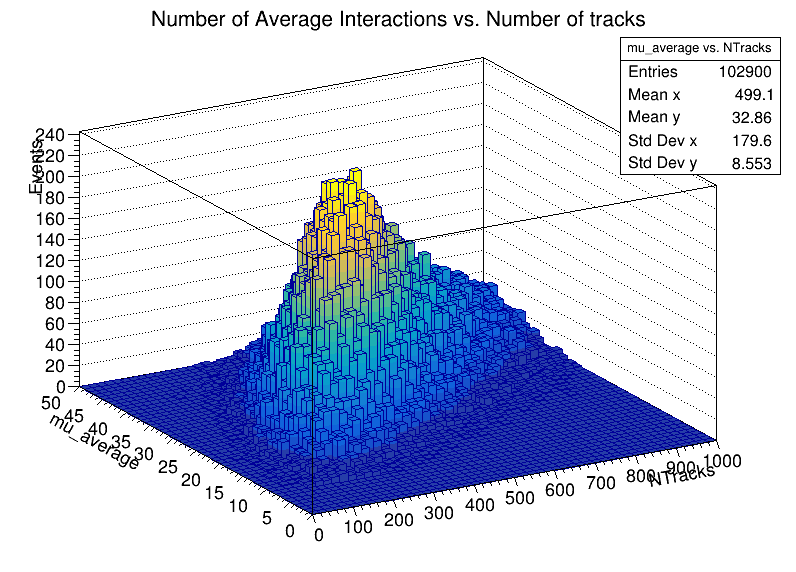

In [20]:
hist_mu_nTrks->SetFillColor(kBlue);
hist_mu_nTrks->Draw("LEGO2");
canvas->Draw();

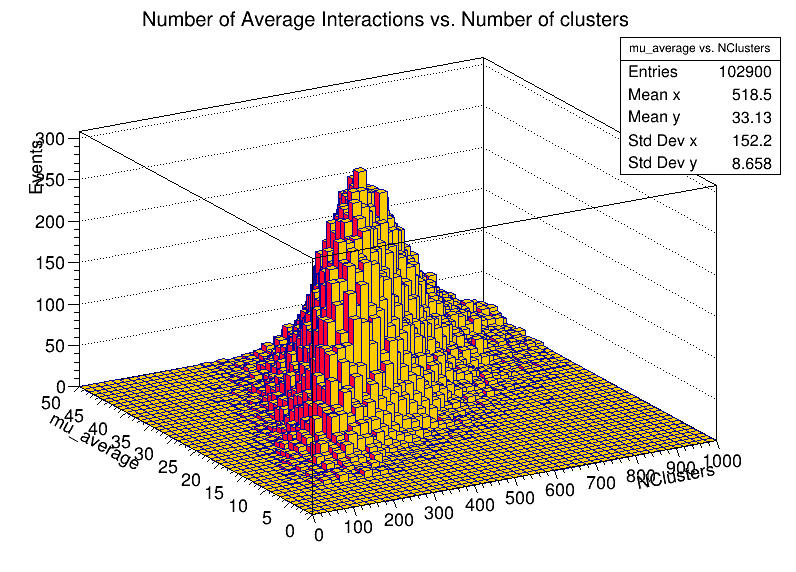

In [21]:
hist_mu_nCltrs->SetFillColor(kOrange);
hist_mu_nCltrs->Draw("LEGO1");
canvas->Draw();

<b>4. Plot all track and cluster variables<\b>

In [22]:
vector<float> *tracks_eta;
vector<float> *tracks_phi;
vector<float> *tracks_m;
vector<float> *tracks_vtx;

vector<float> *clusters_eta;
vector<float> *clusters_phi;
vector<float> *clusters_m;

vector<float> *prtcls_pt;
vector<float> *prtcls_eta;
vector<float> *prtcls_phi;
vector<float> *prtcls_m;
vector<float> *prtcls_pdgID;


tree->SetBranchAddress("Tracks_eta", &tracks_eta);
tree->SetBranchAddress("Tracks_phi", &tracks_phi);
tree->SetBranchAddress("Tracks_m", &tracks_m);
tree->SetBranchAddress("Tracks_vtx", &tracks_vtx);

tree->SetBranchAddress("Clusters_eta", &clusters_eta);
tree->SetBranchAddress("Clusters_phi", &clusters_phi);
tree->SetBranchAddress("Clusters_m", &clusters_m);

tree->SetBranchAddress("Particles_pt", &prtcls_pt);
tree->SetBranchAddress("Particles_eta", &prtcls_eta);
tree->SetBranchAddress("Particles_phi", &prtcls_phi);
tree->SetBranchAddress("Particles_m", &prtcls_m);
tree->SetBranchAddress("Particles_pdgID", &prtcls_pdgID);

In [23]:
TH1F *hist_lead_track_pT = new TH1F("Lead_Track_pT","Example plot: Track pT; pT (MeV) ; Events ",50,100,1000);
TH1F *hist_lead_track_eta = new TH1F("Lead_Track_eta","Example plot: Track eta; eta (MeV) ; Events ",50,-3,3);
TH1F *hist_lead_track_phi = new TH1F("Lead_Track_phi","Example plot: Track phi; phi (MeV) ; Events ",50,-4,4);
TH1F *hist_lead_track_m = new TH1F("Lead_Track_m","Example plot: Track m; m (MeV) ; Events ",50,-1000,1000);
TH1F *hist_lead_track_vtx = new TH1F("Lead_Track_vtx","Example plot: Track vtx; vtx (MeV) ; Events ",50,-5,100);

TH1F *hist_lead_cltrs_pT = new TH1F("Lead_Clusters_pT","Example plot: Clusters pT; pT (MeV) ; Events ",50,100,1000);
TH1F *hist_lead_cltrs_eta = new TH1F("Lead_Clusters_eta","Example plot: Clusters eta; eta (MeV) ; Events ",50,-5,5);
TH1F *hist_lead_cltrs_phi = new TH1F("Lead_Clusters_phi","Example plot: Clusters phi; phi (MeV) ; Events ",50,-4,4);
TH1F *hist_lead_cltrs_m = new TH1F("Lead_Clusters_m","Example plot: Clusters m; m (MeV) ; Events ",50,-0.5,0.5);

TH1F *hist_lead_prtcls_pT = new TH1F("Lead_Particles_pT","Example plot: Particles pT; pT (MeV) ; Events ",50,100,1000);
TH1F *hist_lead_prtcls_eta = new TH1F("Lead_Particles_eta","Example plot: Particles eta; eta (MeV) ; Events ",50,-6,6);
TH1F *hist_lead_prtcls_phi = new TH1F("Lead_Particles_phi","Example plot: Particles phi; phi (MeV) ; Events ",50,-4,4);
TH1F *hist_lead_prtcls_m = new TH1F("Lead_Particles_m","Example plot: Particles m; m (MeV) ; Events ",50,-10,1600);
TH1F *hist_lead_prtcls_pdgID = new TH1F("Lead_Particles_pdgID","Example plot: Particles pdgID; pdgID (MeV) ; Events ",50,-4000,4000);

In [24]:
int nentries3, nbytes3, l;
nentries3 = (Int_t)tree->GetEntries();

for (l = 0; l < nentries3; l++)
{
    nbytes3 = tree->GetEntry(l);
    
    for(int tr0=0; tr0<tracks_pt->size(); tr0++)
    {
        hist_lead_track_pT->Fill(tracks_pt->at(tr0));
    }
    for(int tr1=0; tr1<tracks_eta->size(); tr1++)
    {
        hist_lead_track_eta->Fill(tracks_eta->at(tr1));
    }
    for(int tr2=0; tr2<tracks_phi->size(); tr2++)
    {
        hist_lead_track_phi->Fill(tracks_phi->at(tr2));
    }
    for(int tr3=0; tr3<tracks_m->size(); tr3++)
    {
        hist_lead_track_m->Fill(tracks_m->at(tr3));
    }
    for(int tr4=0; tr4<tracks_vtx->size(); tr4++)
    {
        hist_lead_track_vtx->Fill(tracks_vtx->at(tr4));
    }
    
    for(int tr5=0; tr5<clusters_pt->size(); tr5++)
    {
        hist_lead_cltrs_pT->Fill(clusters_pt->at(tr5));
    }
    for(int tr6=0; tr6<clusters_eta->size(); tr6++)
    {
        hist_lead_cltrs_eta->Fill(clusters_eta->at(tr6));
    }
    for(int tr7=0; tr7<clusters_phi->size(); tr7++)
    {
        hist_lead_cltrs_phi->Fill(clusters_phi->at(tr7));
    }
    for(int tr8=0; tr8<clusters_m->size(); tr8++)
    {
        hist_lead_cltrs_m->Fill(clusters_m->at(tr8));
    }
    
    for(int tr9=0; tr9<prtcls_pt->size(); tr9++)
    {
        hist_lead_prtcls_pT->Fill(prtcls_pt->at(tr9));
    }
    for(int tr10=0; tr10<prtcls_eta->size(); tr10++)
    {
        hist_lead_prtcls_eta->Fill(prtcls_eta->at(tr10));
    }
    for(int tr11=0; tr11<prtcls_phi->size(); tr11++)
    {
        hist_lead_prtcls_phi->Fill(prtcls_phi->at(tr11));
    }
    for(int tr12=0; tr12<prtcls_m->size(); tr12++)
    {
        hist_lead_prtcls_m->Fill(prtcls_m->at(tr12));
    }
    for(int tr13=0; tr13<prtcls_pdgID->size(); tr13++)
    {
        hist_lead_prtcls_pdgID->Fill(prtcls_pdgID->at(tr13));
    }
}

std::cout << "Done!" << std::endl;

Done!


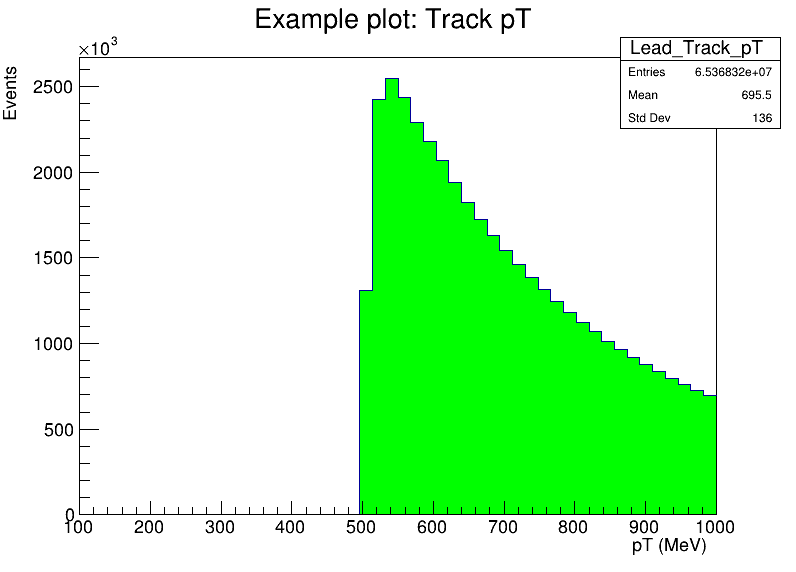

In [25]:
hist_lead_track_pT->SetFillColor(kGreen);
hist_lead_track_pT->Draw();
canvas->Draw();

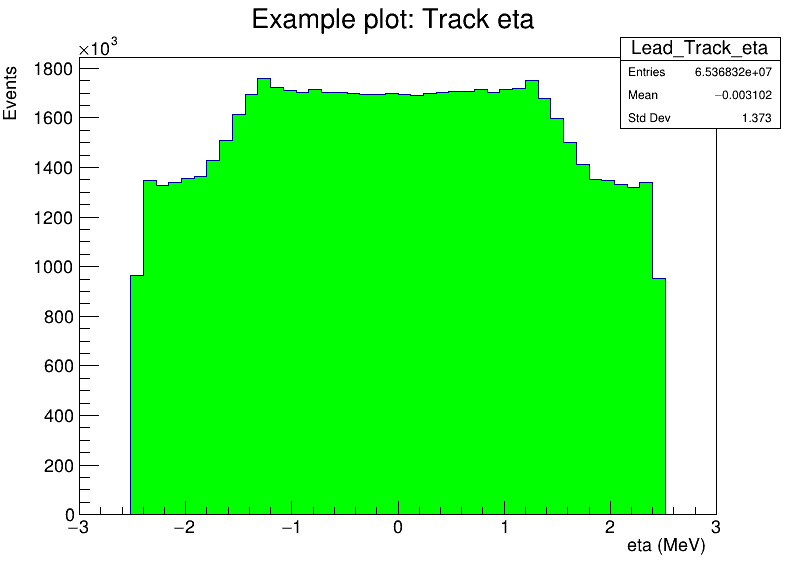

In [26]:
hist_lead_track_eta->SetFillColor(kGreen);
hist_lead_track_eta->Draw();
canvas->Draw();

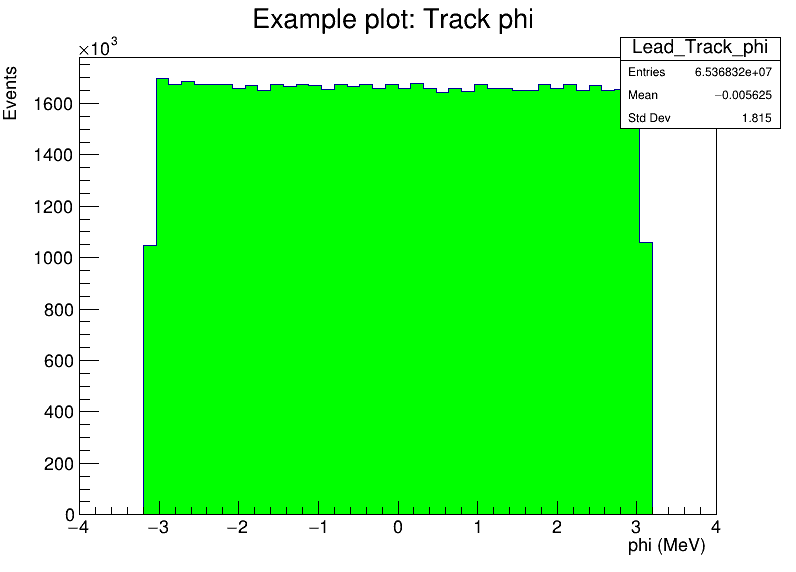

In [27]:
hist_lead_track_phi->SetFillColor(kGreen);
hist_lead_track_phi->Draw();
canvas->Draw();

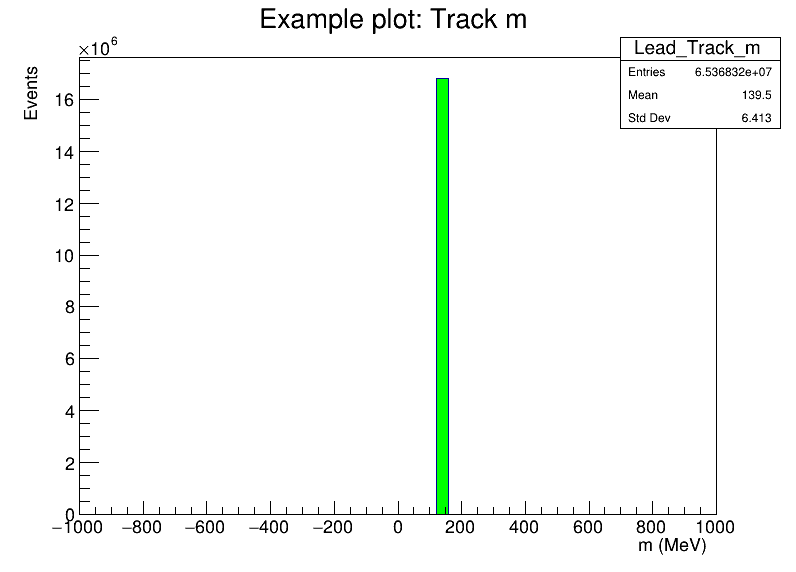

In [28]:
hist_lead_track_m->SetFillColor(kGreen);
hist_lead_track_m->Draw();
canvas->Draw();

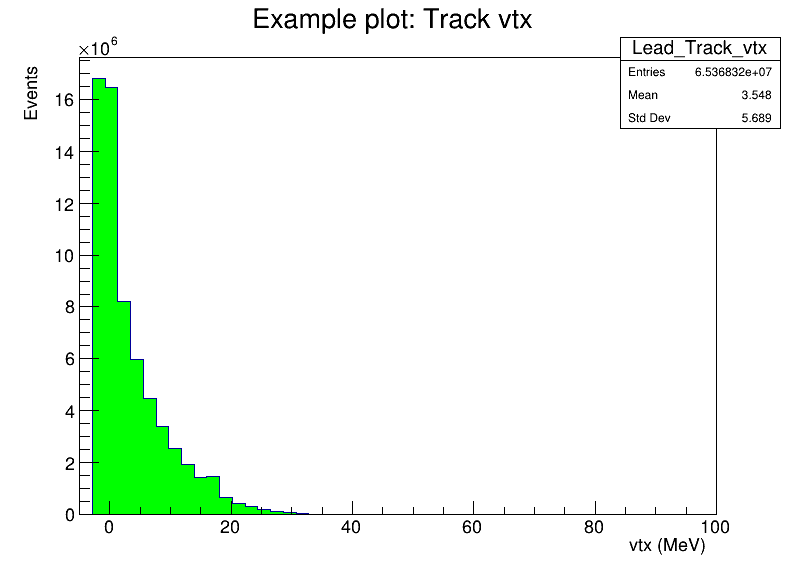

In [29]:
hist_lead_track_vtx->SetFillColor(kGreen);
hist_lead_track_vtx->Draw();
canvas->Draw();

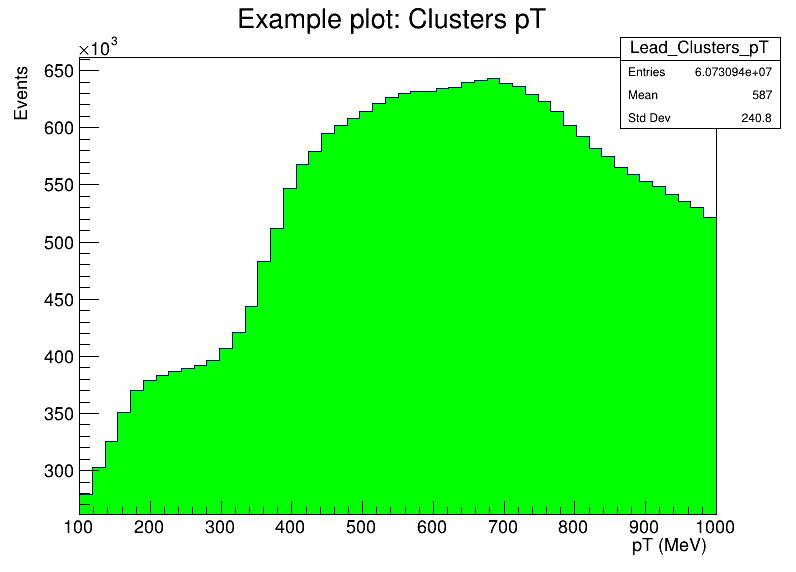

In [30]:
hist_lead_cltrs_pT->SetFillColor(kGreen);
hist_lead_cltrs_pT->Draw();
canvas->Draw();

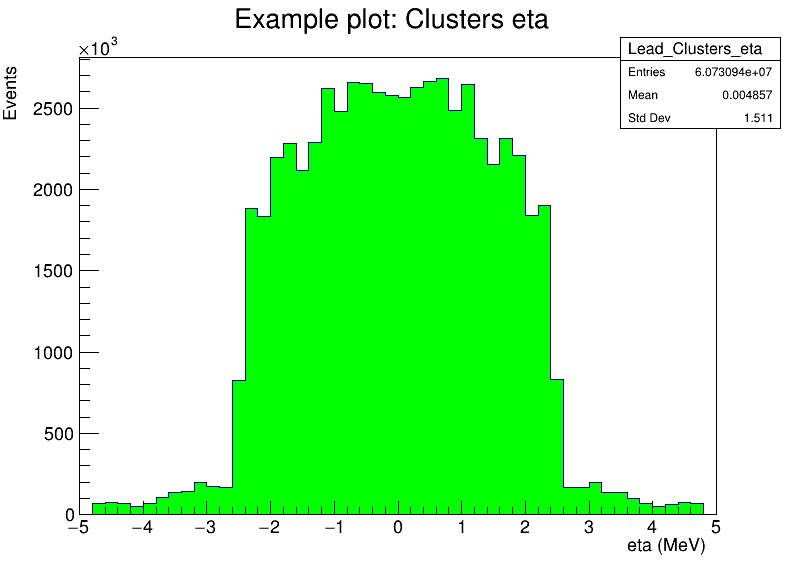

In [31]:
hist_lead_cltrs_eta->SetFillColor(kGreen);
hist_lead_cltrs_eta->Draw();
canvas->Draw();

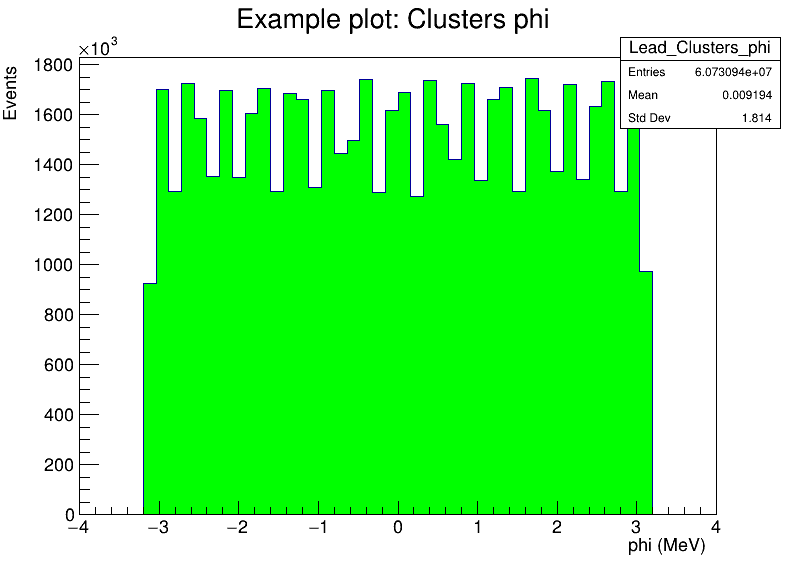

In [32]:
hist_lead_cltrs_phi->SetFillColor(kGreen);
hist_lead_cltrs_phi->Draw();
canvas->Draw();

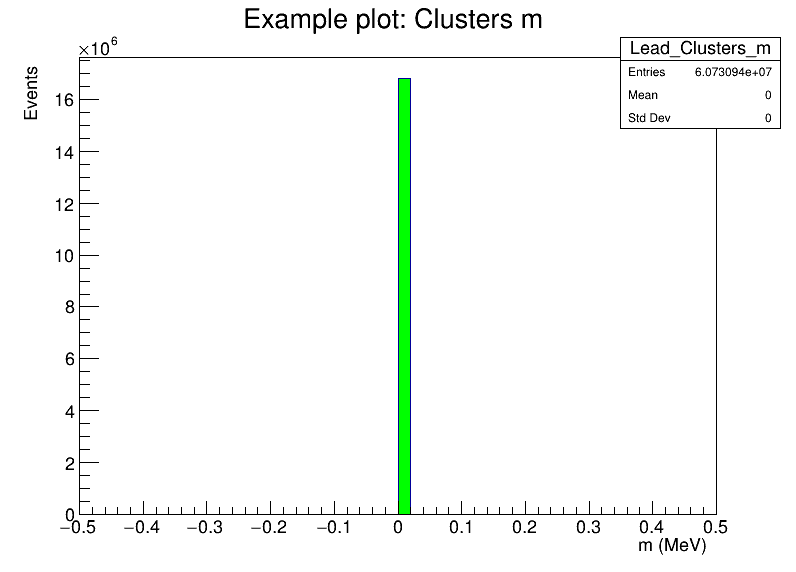

In [33]:
hist_lead_cltrs_m->SetFillColor(kGreen);
hist_lead_cltrs_m->Draw();
canvas->Draw();

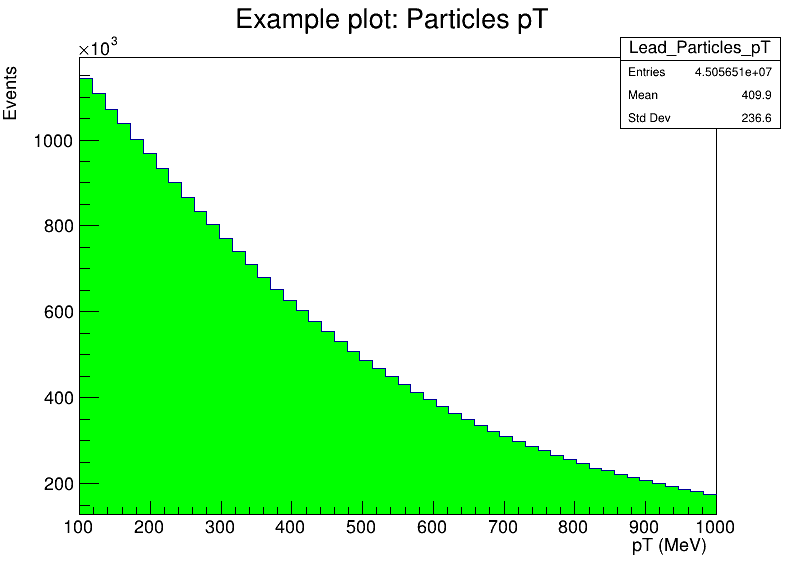

In [34]:
hist_lead_prtcls_pT->SetFillColor(kGreen);
hist_lead_prtcls_pT->Draw();
canvas->Draw();

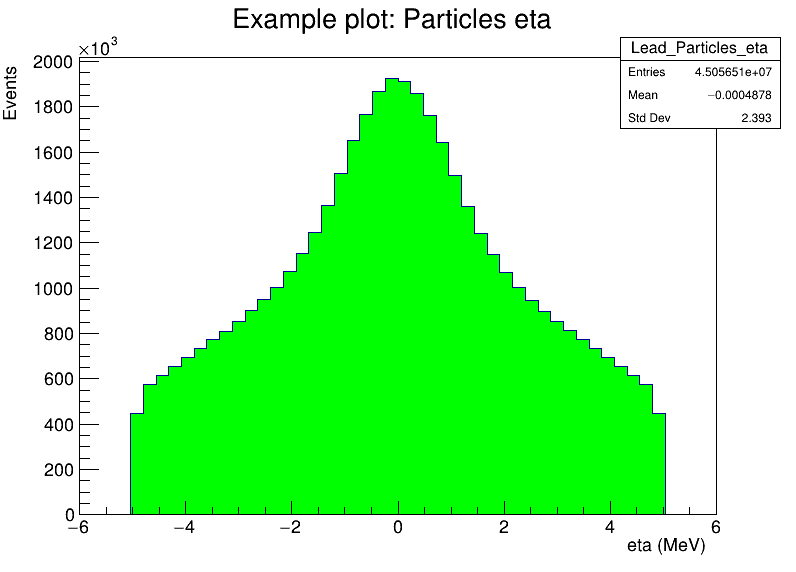

In [35]:
hist_lead_prtcls_eta->SetFillColor(kGreen);
hist_lead_prtcls_eta->Draw();
canvas->Draw();

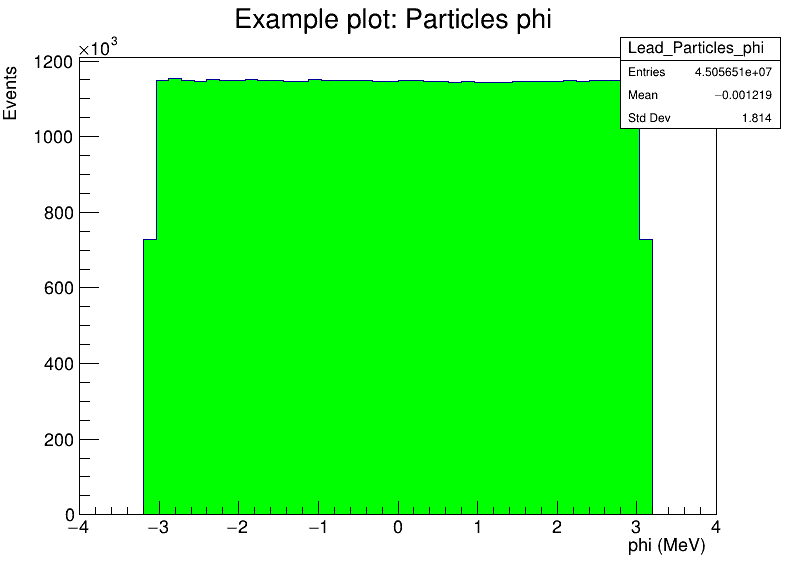

In [36]:
hist_lead_prtcls_phi->SetFillColor(kGreen);
hist_lead_prtcls_phi->Draw();
canvas->Draw();

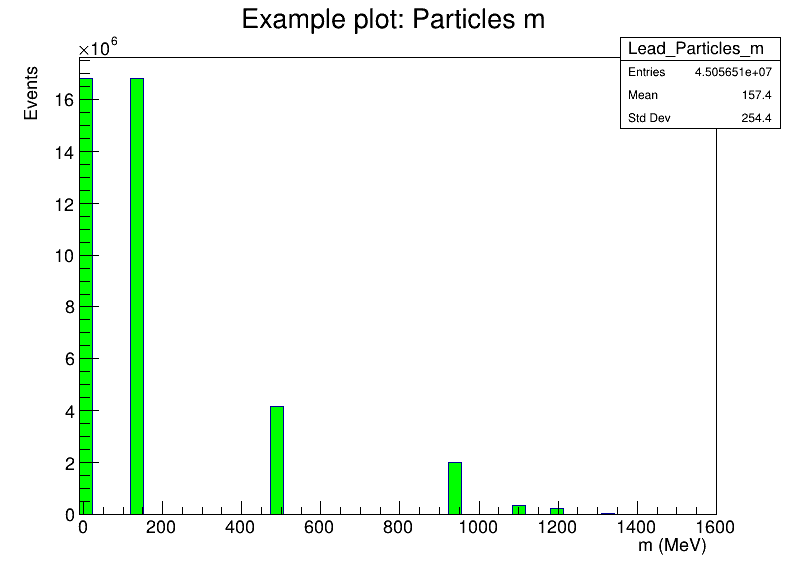

In [37]:
hist_lead_prtcls_m->SetFillColor(kGreen);
hist_lead_prtcls_m->Draw();
canvas->Draw();

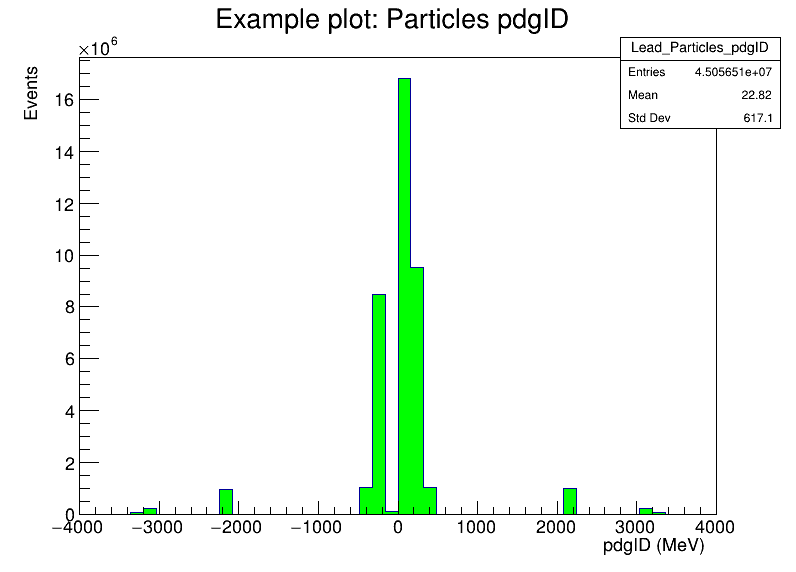

In [38]:
hist_lead_prtcls_pdgID->SetFillColor(kGreen);
hist_lead_prtcls_pdgID->Draw();
canvas->Draw();

<b>5. Interpret the meaning of each variable

<b>6. What is "Particle PDG ID"?